**Heart Disease Prediction**





 In this machine learning project, I have collected the dataset from kaggle and I will be using machine learning to predict whether any person is suffering from heart disease.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline


In [ ]:
import warnings
warnings.filterwarnings('ignore')

Here, we will be experimenting with 4 algorithms.

1. KNeighboursclassifier
2. Randomforestclassifier
3. LogisticRegression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Loading the csv file
df = pd.read_csv('heart disease dataset.csv')

In [ ]:
# Print first five rows of the dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [ ]:
# Print last five rows of dataset
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
259318,No,31.32,No,No,No,2,0,No,Female,55-59,White,No,Yes,Very good,5,No,No,No
259319,No,20.92,No,No,No,0,0,No,Male,60-64,White,No,Yes,Very good,7,No,No,No
259320,No,29.63,Yes,No,No,20,20,Yes,Female,50-54,White,No,No,Very good,5,Yes,No,No
259321,Yes,37.13,Yes,No,No,7,10,No,Female,60-64,White,Yes,No,Fair,6,Yes,Yes,No
259322,No,18.99,Yes,No,No,0,2,No,Male,35-39,White,No,Yes,Very good,8,No,No,No


In [ ]:
# Getting some information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259323 entries, 0 to 259322
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      259323 non-null  object 
 1   BMI               259323 non-null  float64
 2   Smoking           259323 non-null  object 
 3   AlcoholDrinking   259323 non-null  object 
 4   Stroke            259323 non-null  object 
 5   PhysicalHealth    259323 non-null  int64  
 6   MentalHealth      259323 non-null  int64  
 7   DiffWalking       259323 non-null  object 
 8   Sex               259323 non-null  object 
 9   AgeCategory       259323 non-null  object 
 10  Race              259323 non-null  object 
 11  Diabetic          259323 non-null  object 
 12  PhysicalActivity  259323 non-null  object 
 13  GenHealth         259323 non-null  object 
 14  SleepTime         259323 non-null  int64  
 15  Asthma            259323 non-null  object 
 16  KidneyDisease     25

In [ ]:
# Statistical measures about the data
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,259323.000000,259323.000000,259323.000000,259323.000000
mean,28.323920,3.344971,3.887762,7.102124
std,6.360332,7.922216,7.940862,1.437803
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.320000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


In [ ]:
# Number of rows and columns in dataset
df.shape

(259323, 18)

In [ ]:
df.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


**Data Processing**

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine learning models. First I'll use the get_dumies method to create dummy columns for categorical variables.

In [ ]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:
dataset = pd.get_dummies(df, columns = ['Sex', 'Smoking', 'AlcoholDrinking', 'Stroke', 'Race', 'Asthma', 'Diabetic', 'PhysicalActivity'])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
columns_to_scale = ['PhysicalHealth', 'MentalHealth', 'SleepTime']
dataset[columns_to_scale] = standardscaler.fit_transform(dataset[columns_to_scale])

Correlation

array([[<Axes: title={'center': 'BMI'}>,
        <Axes: title={'center': 'PhysicalHealth'}>],
       [<Axes: title={'center': 'MentalHealth'}>,
        <Axes: title={'center': 'SleepTime'}>]], dtype=object)

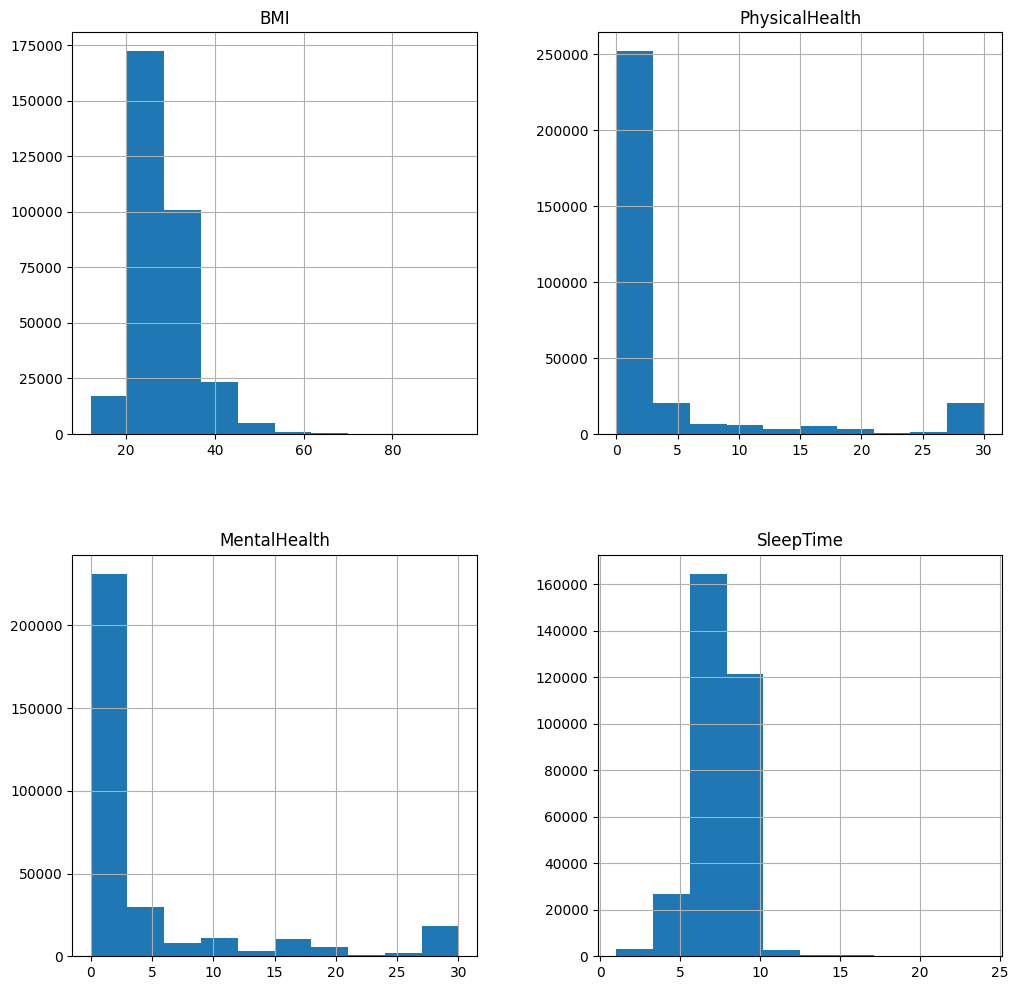

In [ ]:
df.hist(figsize=(12,12))

1 --> Defective heart

0 --> Healthy heart

**Splitting the features and target**

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
random_seed = 32
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state= random_seed)

**KNN Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the KNN model to the training data
knn.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Replace y_test and y_pred with your actual variables

# Compute accuracy
accuracy_KNN = accuracy_score(y_test, y_pred)

print("Accuracy of KNN model:", accuracy_KNN)

Accuracy of KNN model: 0.6557377049180327


**Confusion Matrix for KNN model**

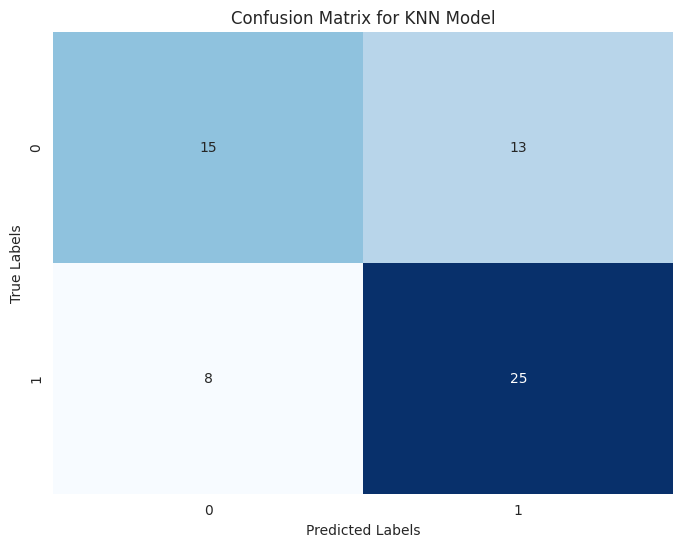

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test_knn contains the true labels and y_pred_knn contains the predicted labels for KNN model
# Replace y_test_knn and y_pred_knn with actual variables

# Compute confusion matrix for KNN model
conf_matrix_knn = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for KNN model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
y = df['target']
x = df.drop(['target'], axis = 1)

In [ ]:
random_seed=32
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=random_seed)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Create a Random Forest classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the Random Forest model to the training data
rf_classifier.fit(x_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = rf_classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming y_test contains the true labels and y_pred contains the predicted labels
# Replace y_test and y_pred with your actual variables

# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred)

print("Accuracy of Random Forest model:", accuracy_rf)

Accuracy of Random Forest model: 0.8688524590163934


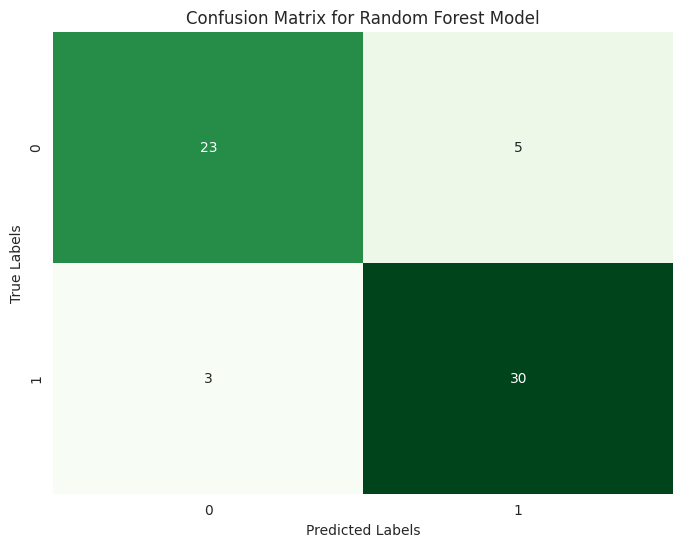

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix for Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()


Splitting the data into training data and test data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
Y = df['target']
X = df.drop(['target'], axis = 1)

In [ ]:
random_seed=32
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=random_seed)

Logistic Regression


In [ ]:
model = LogisticRegression()

In [ ]:
# Training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create a logistic regression classifier
logreg_classifier = LogisticRegression()

# Fit the logistic regression model to the training data
logreg_classifier.fit(X_train, Y_train)

# Use the trained model to make predictions on the test data
y_pred = logreg_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy
accuracy_logreg = accuracy_score(Y_test, y_pred)

print("Accuracy of Logistic Regression model:", accuracy_logreg)

Accuracy of Logistic Regression model: 0.8360655737704918


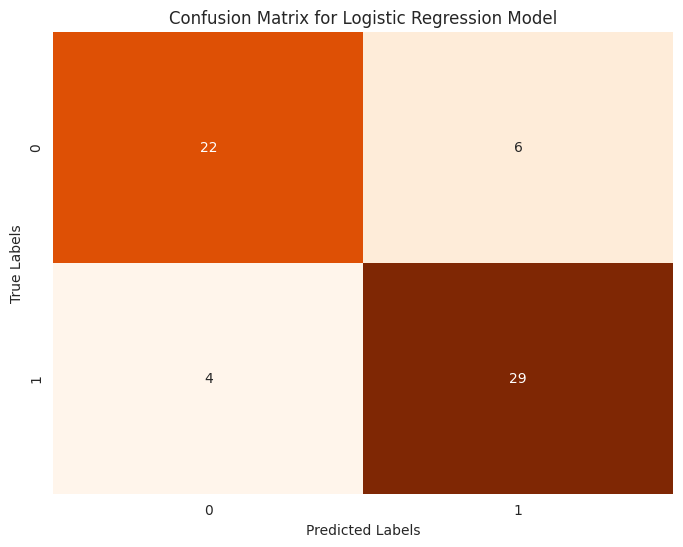

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for Logistic Regression model
conf_matrix_logreg = confusion_matrix(Y_test, y_pred)

# Plot confusion matrix for Logistic Regression model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


In [ ]:
input_data = (41,0,1,130,204,0,0,172,0,1.4,2,0,2)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The person does not have a Heart Disease')
else:
  print('The person has Heart Disease')

[1]
The person has Heart Disease


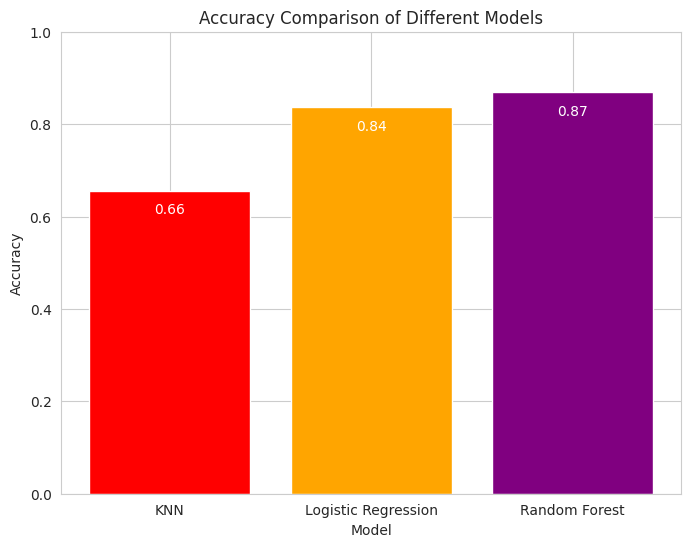

In [ ]:
import matplotlib.pyplot as plt

# Accuracy scores of KNN, Logistic Regression, and Random Forest models
accuracy_scores = [accuracy_KNN, accuracy_logreg, accuracy_rf]

# Labels for the models
model_names = ['KNN', 'Logistic Regression', 'Random Forest']

# Plotting the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(model_names, accuracy_scores, color=['red', 'orange', 'purple'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 (as accuracy ranges from 0 to 1)

# Annotate bars with their corresponding accuracy values
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, accuracy - 0.05, f'{accuracy:.2f}', ha='center', color='white')

plt.show()
